# STARBUCKS LOCATION WORLDWIDE
Starbucks Corporation adalah sebuah perusahaan kopi dan jaringan kedai kopi global asal Amerika Serikat yang berkantor pusat di Seattle, Washington. Merupakan kedai kopi terbesar di 72 Negara dan memiliki lebih dari 87.000 lebih kombinasi jenis minuman. Kedai Starbucks pertama dibuka di Seattle, Washington, pada tanggal 30 Maret 1971 oleh tiga rekanan: guru bahasa Inggris Jerry Baldwin, guru sejarah Zev Siegl, dan penulis Gordon Bowker. Ketiganya terinspirasi oleh pengusaha pemanggangan kopi Alfred Peet, yang mereka kenal secara pribadi, untuk menjual biji kopi berkualitas tinggi beserta peralatannya.

## Datasets:
data yang diambil merupakan dataset dari kaggle (starbucks location wordlwide, Februari 2017) dengan jumlah data bersih yang akan diproses adalah 25597.


## Goals:

1. Persebaran Starbucks Coorporation diseluruh dunia
2. Beverages Culture Starbucks Coorporation berdasarkan luas wilayah, meliputi :
    a. Country
    b. State/province
    c. City
3. Type Ownership Starbucks Coorporation


## Info Data:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('directory.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
Brand             25600 non-null object
Store Number      25600 non-null object
Store Name        25600 non-null object
Ownership Type    25600 non-null object
Street Address    25598 non-null object
City              25585 non-null object
State/Province    25600 non-null object
Country           25600 non-null object
Postcode          24078 non-null object
Phone Number      18739 non-null object
Timezone          25600 non-null object
Longitude         25599 non-null float64
Latitude          25599 non-null float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [4]:
df.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

## Cleaning Data:
berdasarkan info diatas kita melakukan cleansing data terhadap colomn yang memiliki missing value, yaitu: 
Street Address(2), City(15), Postcode(1522), Phone Number(6861),Longitude(1), Latitude(1)

### Drop Column

kolom yang akan di drop yaitu Postcode dan Phone Number, karena berdasarkan Goals kita tidak menggunakan 2 kolom tersebut untuk analisa lebih lanjut 

In [5]:
df.drop(columns=['Postcode','Phone Number'], inplace=True)

### Dropna 
kolom yang akan di dropna yaitu Street Address, Longitude, dan Latitude. 3 kolom tersebut jumlanya sangat kecil, tidak significant dan dibawah 50% dari total data. dan juga apabila 3 kolom tersebut di dropna, tidak mengurangi variasi sebaran data terhadap country, city dan state/province

In [6]:
df.dropna(subset=['Street Address','Longitude','Latitude'], inplace=True)

### Ubah Type Data
semua data pada kolom merupakan type data object (kecuali kolom Longitude dan Latitude). untuk keperluan visualisasi, kolom Brand dan Ownership Type akan diubah menjadi categorical

In [7]:
df[['Brand','Ownership Type']] = df[['Brand','Ownership Type']].astype('category')

### Fill NaN:
kolom yang akan difill yaitu kolom City(15)

In [8]:
xindex = df[(df['State/Province'] == 'C') & (df['City'].isnull())].index
for item in xindex:
    df['City'][item] = 'Cairo'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
xindex2 = df[(df['State/Province'] == 'JS') & (df['City'].isnull())].index
for item in xindex2:
    df['City'][item] = 'Sharm el-Sheikh'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
xindex3 = df[(df['State/Province'] == 'ALX') & (df['City'].isnull())].index
for item in xindex3:
    df['City'][item] = 'Alexandria'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
xindex4 = df[(df['State/Province'] == '13') & (df['City'].isnull())].index
for item in xindex4:
    df['City'][item] = 'Kuching'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
xindex5 = df[(df['State/Province'] == '2') & (df['City'].isnull())].index
for item in xindex5:
    df['City'][item] = 'Mecca'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Data Cleaned

In [13]:
df.isnull().sum()

Brand             0
Store Number      0
Store Name        0
Ownership Type    0
Street Address    0
City              0
State/Province    0
Country           0
Timezone          0
Longitude         0
Latitude          0
dtype: int64

## Visualisasi Data

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


import plotly.express as plx
import plotly.graph_objects as go

In [15]:
#Menggolongkan dataframe setiap negara, dengan unique value indices:

Country_indices, Country_labels = df.Country.factorize()
df["Country_Indice"] = Country_indices

In [16]:
#tambahan dataframe yang memuat daftar negara berdasarkan singkatan negara ISO2:

df2 = pd.read_csv('country_list.csv')
df = df.merge(df2, left_on='Country', right_on='Code')
df.drop('Code', axis=1, inplace=True)

### Goals 1: Persebaran Starbucks Corporation diseluruh dunia

In [17]:
co_lat_long = pd.Series(df.Name + "<br>"+df['City']+"<br><br>"+df['Street Address']+"<br>"+df.Latitude.astype(str) + ' : ' + df.Longitude.astype(str))

In [18]:
trace = go.Scattergeo(
    lat=df.Latitude, 
    lon=df.Longitude, 
    mode='markers',
    hoverinfo = 'text', 
    text=co_lat_long,
    marker = dict( 
        size=2, 
        color= df.Country_Indice,
        colorscale='jet',
        autocolorscale = False,
    )
)

data = [trace]

layout = dict(
    title = 'Starbucks Locations Worldwide<br>(Hover for Locations)',
    showlegend = False, 
    geo = dict(
        showframe=False,
        showland = True,
        showlakes = False,
        showcountries = True,
        showcoastlines=False, 
        showocean = False,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict(data = data, layout = layout)
iplot(fig)

### Goals 2: Beverages Culture Starbucks Coorporation berdasarkan luas wilayah, meliputi :
    A. Country
    B. State/province
    C. City


#### A. Country (top 15 most located starbucks store)

In [19]:
top_fifteen_countries = df.Name.value_counts().head(15)
country_names =  top_fifteen_countries.index
country_values = top_fifteen_countries.values


Text(0, 0.5, 'STARBUCKS STORE IN TOTAL')

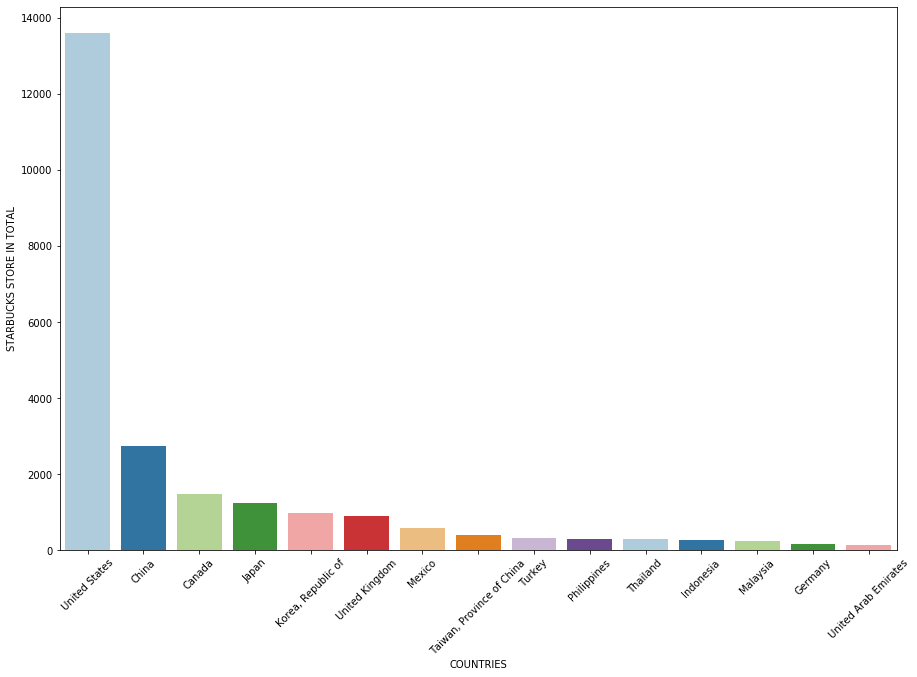

In [20]:
plt.figure(figsize=(15,10))

sns.barplot(x=country_names, y=country_values, palette=sns.color_palette('Paired', n_colors=10))
plt.xticks(rotation= 45)
plt.xlabel('COUNTRIES')
plt.ylabel('STARBUCKS STORE IN TOTAL')

#### berdasarkan grafik, dapat dilihat bahwa most located starbucks store ada di  negara US dengan total store (13.608) yang jumlahnya jauh dengan negara-negara lain. fakta ini berbanding lurus dengan asal muasal toko pertama starbucks, ekspansi dan popularitasnya yang bermula dari negara US

#### B. State/Province (top 15 most located starbucks store)

In [21]:
top_fifteen_state = df['State/Province'].value_counts().head(15)
state_names =  top_fifteen_state.index
state_values = top_fifteen_state.values

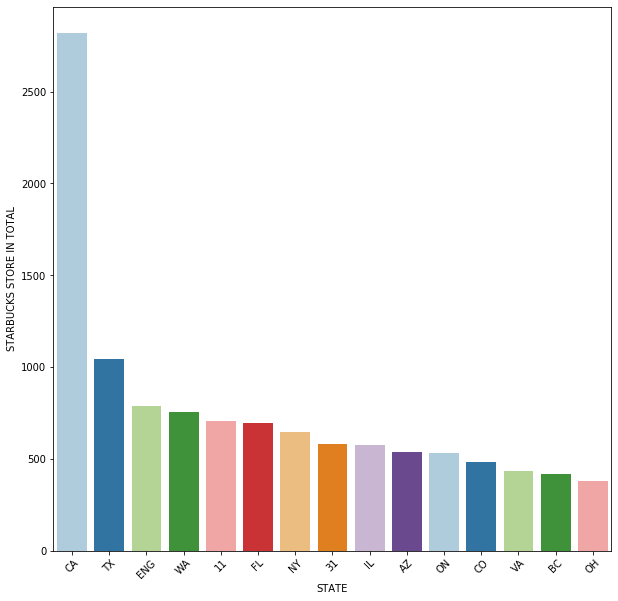

In [22]:
plt.figure(figsize=(10,10))

sns.barplot(x=state_names, y=state_values, palette=sns.color_palette('Paired', n_colors=10))
plt.xticks(rotation= 45)
plt.xlabel('STATE')
plt.ylabel('STARBUCKS STORE IN TOTAL');

#### Most located starbucks store berdasarkan state adalah California(CA) dengan jumlah store 2821. California merupakan state dengan jumlah penduduk terpadat di US. dengan produk negara bruto sebesar  3,0 triliun, lebih besar daripada negara bagian lain dan merupakan ekonomi sub-nasional terbesar di dunia (https://en.wikipedia.org/wiki/California)

#### C. City (top 15 most located starbucks store)

In [23]:
top_fifteen_cities = df.City.value_counts().head(15)
city_names =  top_fifteen_cities.index
city_values = top_fifteen_cities.values

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 19978 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 28023 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 24066 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 21271 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 20140 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 49436 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 50872 missing from current font.

C:\ProgramData\Anaco

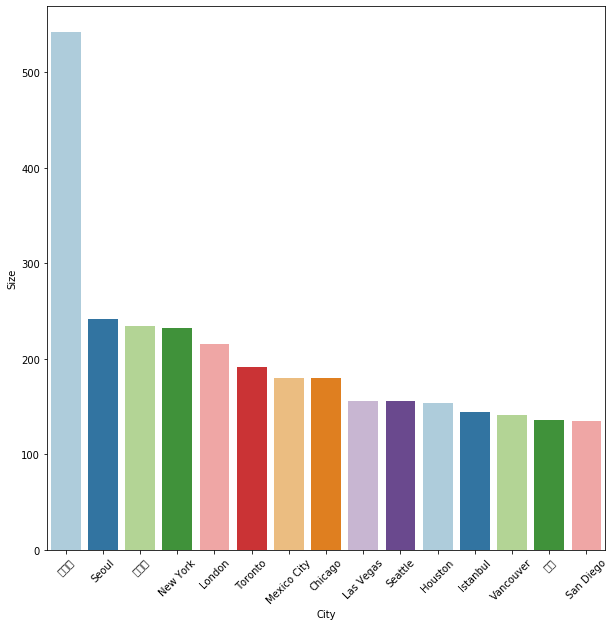

In [24]:
plt.figure(figsize=(10,10))

sns.barplot(x=city_names, y=city_values, palette=sns.color_palette('Paired', n_colors=10))
plt.xticks(rotation= 45)
plt.xlabel('City')
plt.ylabel('Size');

#### Most located starbucks store berdasarkan city adalah Shanghai dengan store sebanyak 520. Shanghai adalah kota terbesar di negara China dengan perkembangan pesat satu dekade pada ekonomi, perdagangan, finansial dan komunikasi, serta pertumbuhan imigran signifikan (https://id.wikipedia.org/wiki/Shanghai). Korelasi antara pusat bisnis, jumlah penduduk, dan tingkat konsumsi mungkin jadi penggerak banyaknya starbucks di kota ini

### Goals 3 : Type Ownership Starbucks Coorporation

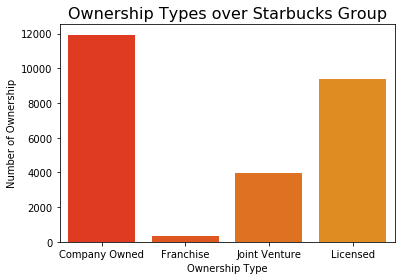

In [25]:
sns.countplot(df['Ownership Type'], palette=sns.color_palette('autumn'))
plt.ylabel('Number of Ownership')
plt.xlabel('Ownership Type')
plt.title('Ownership Types over Starbucks Group', color = 'black', fontsize=16);

#### Berdasarkan type ownership yang paling banyak adalah tipe Company Owned dengan total 11.932. keuntungan lebih pada company owned adalah perusahaan dikuasai seutuhnya, serta fleksibilitas dalam menjalankan usaha baik pergantian strategi penjualan dan pasar serta penambahan produk (https://smallbusiness.chron.com/franchise-vs-company-owned-benefits-19161.html). sedangkan keuntungan lebih pada Licensed iyaitu pemegang lisensi akan membayar hak untuk memegang lisensi bisa berupa pembayaran sekali saja, pembayaran berkelanjutan yang dikenal sebagai royalti, atau pembayaran variabel tergantung pada keuntungan berbeda dengan tipe franchise yang selalu ada kontrol oleh franchisee (https://dosenekonomi.com/bisnis/branding/kelebihan-dan-kekurangan-lisensi)

## Catatan Tambahan:
- dibutuhkan data yang lebih update per tahun 2019, dikarenakan jumlah store starbucks yang bertambah lebih dari 100 store setiap tahunnya
- dibutuhkan data tambahan seperti GDP serta Income bruto starbucks untuk menentukan akurasi tingkat konsumsi starbucks disetiap wilayah. karena minuman yang disediakan di starbucks target pasarnya medium-high class